In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [2]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)
df.head()

,Sex,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
X = df.iloc[:,1:].values
y = df.iloc[:, -1].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=7)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((3341, 11), (836, 11), (3341,), (836,))

In [4]:
X_tr = X_tr.astype('float32')
# X_tr.info()
y_tr = y_tr.astype('float32')
X_te = X_te.astype('float32')
y_te = y_te.astype('float32')

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
X[:5]

array([[ 0.    ,  0.    ,  1.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,
         0.2245,  0.101 ,  0.15  , 15.    ],
       [ 0.    ,  0.    ,  1.    ,  0.35  ,  0.265 ,  0.09  ,  0.2255,
         0.0995,  0.0485,  0.07  ,  7.    ],
       [ 1.    ,  0.    ,  0.    ,  0.53  ,  0.42  ,  0.135 ,  0.677 ,
         0.2565,  0.1415,  0.21  ,  9.    ],
       [ 0.    ,  0.    ,  1.    ,  0.44  ,  0.365 ,  0.125 ,  0.516 ,
         0.2155,  0.114 ,  0.155 , 10.    ],
       [ 0.    ,  1.    ,  0.    ,  0.33  ,  0.255 ,  0.08  ,  0.205 ,
         0.0895,  0.0395,  0.055 ,  7.    ]])

## model

In [11]:
model = Sequential()
model.add(Dense(32, input_shape=(11,)))
model.add(Flatten())
model.add(Dense(1))

In [12]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                384       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [14]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 258us/sample - loss: 85.4936 - mae: 8.7315 - val_loss: 51.3778 - val_mae: 6.7771
Epoch 2/100
2672/2672 [==============================] - 0s 24us/sample - loss: 35.1809 - mae: 5.5037 - val_loss: 17.4966 - val_mae: 3.8856
Epoch 3/100
2672/2672 [==============================] - 0s 28us/sample - loss: 10.5177 - mae: 2.8864 - val_loss: 4.0303 - val_mae: 1.7414
Epoch 4/100
2672/2672 [==============================] - 0s 34us/sample - loss: 2.2154 - mae: 1.1444 - val_loss: 0.7419 - val_mae: 0.5945
Epoch 5/100
2672/2672 [==============================] - 0s 28us/sample - loss: 0.5877 - mae: 0.5364 - val_loss: 0.3897 - val_mae: 0.4770
Epoch 6/100
2672/2672 [==============================] - 0s 25us/sample - loss: 0.4552 - mae: 0.5294 - val_loss: 0.3817 - val_mae: 0.4946
Epoch 7/100
2672/2672 [==============================] - 0s 29us/sample - loss: 0.4433 - mae: 0.5285 - val_loss: 0.3683

2672/2672 [==============================] - 0s 27us/sample - loss: 0.0115 - mae: 0.0840 - val_loss: 0.0094 - val_mae: 0.0751
Epoch 60/100
2672/2672 [==============================] - 0s 34us/sample - loss: 0.0104 - mae: 0.0793 - val_loss: 0.0085 - val_mae: 0.0717
Epoch 61/100
2672/2672 [==============================] - 0s 22us/sample - loss: 0.0093 - mae: 0.0752 - val_loss: 0.0077 - val_mae: 0.0681
Epoch 62/100
2672/2672 [==============================] - 0s 22us/sample - loss: 0.0084 - mae: 0.0714 - val_loss: 0.0070 - val_mae: 0.0644
Epoch 63/100
2672/2672 [==============================] - 0s 23us/sample - loss: 0.0076 - mae: 0.0679 - val_loss: 0.0063 - val_mae: 0.0616
Epoch 64/100
2672/2672 [==============================] - 0s 35us/sample - loss: 0.0069 - mae: 0.0648 - val_loss: 0.0057 - val_mae: 0.0591
Epoch 65/100
2672/2672 [==============================] - 0s 68us/sample - loss: 0.0062 - mae: 0.0612 - val_loss: 0.0051 - val_mae: 0.0553
Epoch 66/100
2672/2672 [================

In [15]:
y_pred = model.predict(X_te)

In [16]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [17]:
score

[0.00032081198683632403, 0.013957794]

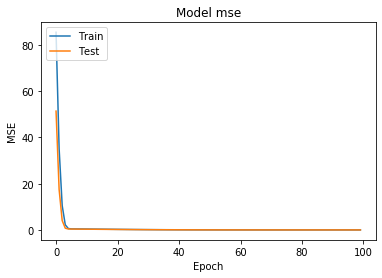

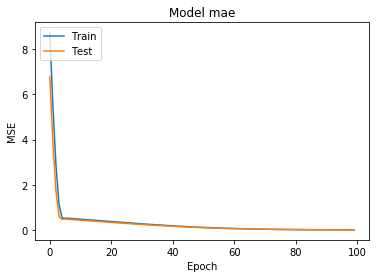

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model

In [33]:
model = Sequential()
model.add(Dense(256, input_shape=(11,)))
model.add(Dense(1))

In [34]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               3072      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [36]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 216us/sample - loss: 24.1430 - mae: 3.8766 - val_loss: 0.3176 - val_mae: 0.4946
Epoch 2/100
2672/2672 [==============================] - 0s 29us/sample - loss: 1.5059 - mae: 1.1283 - val_loss: 0.3421 - val_mae: 0.5188
Epoch 3/100
2672/2672 [==============================] - 0s 25us/sample - loss: 0.2726 - mae: 0.3697 - val_loss: 0.1962 - val_mae: 0.2962
Epoch 4/100
2672/2672 [==============================] - 0s 25us/sample - loss: 0.1656 - mae: 0.3139 - val_loss: 0.1363 - val_mae: 0.3022
Epoch 5/100
2672/2672 [==============================] - 0s 28us/sample - loss: 0.1368 - mae: 0.2879 - val_loss: 0.1092 - val_mae: 0.2441
Epoch 6/100
2672/2672 [==============================] - 0s 25us/sample - loss: 0.1174 - mae: 0.2625 - val_loss: 0.0945 - val_mae: 0.2417
Epoch 7/100
2672/2672 [==============================] - 0s 28us/sample - loss: 0.0995 - mae: 0.2465 - val_loss: 0.0787 - v

2672/2672 [==============================] - 0s 28us/sample - loss: 9.0540e-05 - mae: 0.0065 - val_loss: 7.8359e-05 - val_mae: 0.0062
Epoch 59/100
2672/2672 [==============================] - 0s 30us/sample - loss: 8.8111e-05 - mae: 0.0063 - val_loss: 7.6849e-05 - val_mae: 0.0061
Epoch 60/100
2672/2672 [==============================] - 0s 27us/sample - loss: 8.7008e-05 - mae: 0.0063 - val_loss: 7.5381e-05 - val_mae: 0.0061
Epoch 61/100
2672/2672 [==============================] - 0s 27us/sample - loss: 8.5285e-05 - mae: 0.0062 - val_loss: 7.4858e-05 - val_mae: 0.0060
Epoch 62/100
2672/2672 [==============================] - 0s 29us/sample - loss: 8.3678e-05 - mae: 0.0061 - val_loss: 7.2796e-05 - val_mae: 0.0060
Epoch 63/100
2672/2672 [==============================] - 0s 28us/sample - loss: 8.2143e-05 - mae: 0.0061 - val_loss: 7.1395e-05 - val_mae: 0.0059
Epoch 64/100
2672/2672 [==============================] - 0s 28us/sample - loss: 8.0758e-05 - mae: 0.0060 - val_loss: 7.1290e-05 - 

In [37]:
y_pred = model.predict(X_te)

In [38]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [39]:
score

[3.0228807560614374e-05, 0.0036867706]

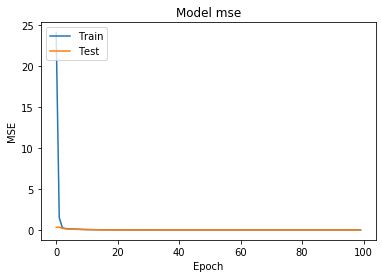

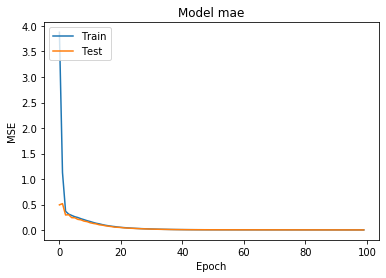

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()